### Importación de datos



In [5]:
# Importar datos. Ojo con el raw, es importante para importar como datos utilizables.
# https://github.com/333CME/Challengue-Data-Science/blob/main/tienda_1.csv Tuve que eliminar el blob y el espacio el archivo tenía un espacio en el nombre
# El espacio en el nombre del archivo generaba y error en la url % y no podía correr el código
'''En general desarrollé el código para ir haciendo mejoras, con la ayuda de IA, como por ejemplo:
Cambié todas las url por una url genérica que permita al código agragar todas las url con datos necasarias
Mediante la función datos con un ciclo for asignado a un rango desde 1 a 5, pero que se podría modificar eventualmente hasta n
Esta fue la parte más compleja de la investigación para el código'''
import pandas as pd
datos = pd.concat([pd.read_csv(f"https://raw.githubusercontent.com/333CME/Challengue-Data-Science/main/tienda_{i}.csv").assign(Tienda=f'Tienda_{i}') for i in range(1,5)])


In [6]:
# Mostrar estructura de datos
datos.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon,Tienda
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175,Tienda_1
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359,Tienda_1
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444,Tienda_1
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250,Tienda_1
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359,Tienda_1


In [7]:
pip install pandas matplotlib

#1. Análisis de facturación



In [8]:
# Para calcular la facturación creé una función facturacion
facturacion = datos.groupby('Tienda')['Precio'].sum()

<Axes: title={'center': 'Facturación por Tienda'}, xlabel='Tienda', ylabel='Total Pesos $'>

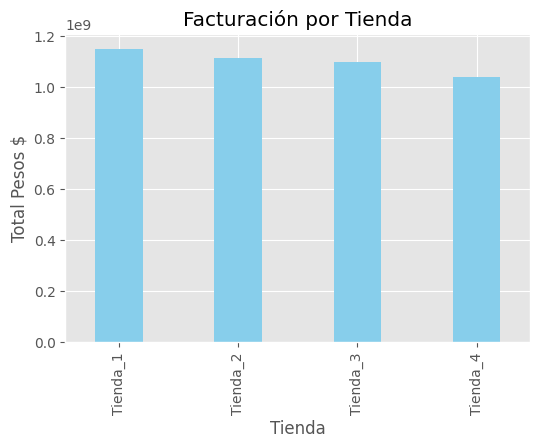

In [ ]:
# Para mostrar los resultados
facturacion.plot(kind='bar', title='Facturación por Tienda', ylabel='Total Pesos $', xlabel='Tienda', figsize=(6,4), width=0.4, color = 'skyblue')
# Posteriormente realicé los ajustes de ancho de barra y color (el valor predeterminado: 0.8)


# 2. Ventas por categoría

In [17]:
# Para calcular las categorías populares
# Aquí es clave usar groupby para grupar datos
# Los puntos se usan para concatenar las instrucciones
categorias_populares = (datos.groupby(['Tienda', 'Categoría del Producto']).size().groupby('Tienda').nlargest(3).reset_index(level=0, drop=True).unstack())


<Axes: title={'center': 'Top 3 Categorías por Tienda'}, xlabel='Tienda', ylabel='Ventas'>

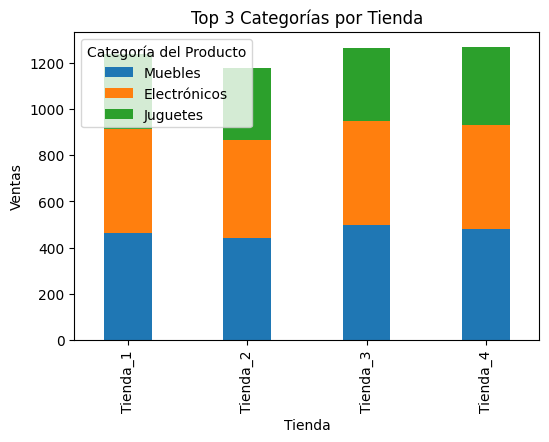

In [18]:
# Mostrar resultados
# tuve que investigar como corregir el primer resultado ya que las etiquetas de las barras eran redundantes
categorias_populares.plot(
    kind='bar',
    stacked=True,
    title='Top 3 Categorías por Tienda',
    ylabel='Ventas',
    figsize=(6, 4),
    width=0.4
)

# 3. Calificación promedio de la tienda


In [ ]:
# Calcular promedio de evaluación
promedio_evaluacion = datos.groupby('Tienda')['Calificación'].mean()

<Axes: title={'center': 'Calificación Promedio por Tienda'}, xlabel='Tienda', ylabel='Puntuación'>

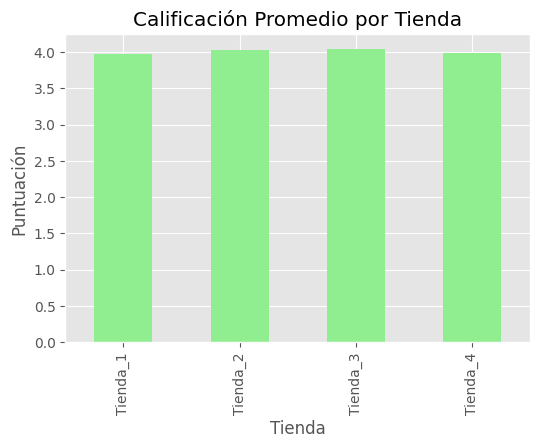

In [ ]:
# Mostrar resultados
promedio_evaluacion.plot(kind='bar', color='lightgreen', title='Calificación Promedio por Tienda', ylabel='Puntuación', figsize=(6,4))

# 4. Productos más y menos vendidos

In [23]:
# Calcular productos más vendidos (Top 3)
top_productos = (
    datos.groupby(['Tienda', 'Producto'])['Cantidad de cuotas'].sum()  # Suma por producto
    .groupby('Tienda').nlargest(3)                                    # Top 3 por tienda
    .reset_index(level=0, drop=True)                                  # Elimina redundancia
    .reset_index()                                                    # Convierte índice en columnas
    .rename(columns={'Cantidad de cuotas': 'Total de Cuotas Vendidas'})  # Renombra columna
)

In [24]:
# Mostrar resultados con formato claro
print("Top 3 Productos por Tienda:\n")
print(
    top_productos.to_string(
        index=False,            # Elimina el índice numérico
        justify='center',       # Centra el texto en las columnas
        col_space=20,           # Espacio mínimo entre columnas (opcional)
    )
)

Top 3 Productos por Tienda:

       Tienda                 Producto          Total de Cuotas Vendidas
      Tienda_1                Secadora de ropa            214           
      Tienda_1                   TV LED UHD 4K            196           
      Tienda_1                   Mesa de noche            188           
      Tienda_2       Iniciando en programación            223           
      Tienda_2                       Iphone 15            195           
      Tienda_2               Guitarra acústica            183           
      Tienda_3                       Bicicleta            191           
      Tienda_3                          Estufa            182           
      Tienda_3                   Juego de mesa            181           
      Tienda_4         Dashboards con Power BI            196           
      Tienda_4                        Cama box            195           
      Tienda_4                      Cubertería            183           


# 5. Envío promedio por tienda

In [ ]:
# Calcular costo de envío promedio
costo_envio = datos.groupby('Tienda')['Costo de envío'].mean()

<Axes: title={'center': 'Costo Promedio de Envío'}, xlabel='Tienda', ylabel='Costo $'>

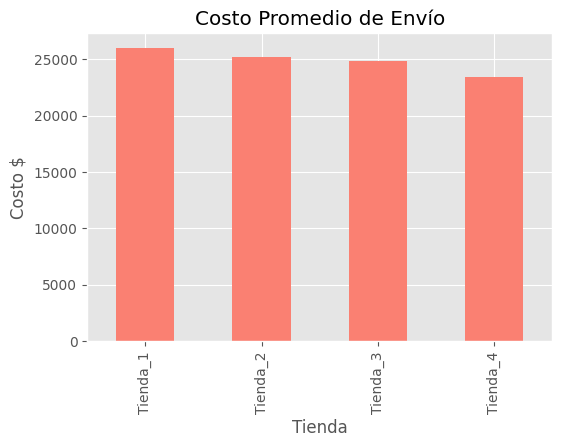

In [ ]:
# Línea 2: Mostrar resultados
costo_envio.plot(kind='bar', color='salmon', title='Costo Promedio de Envío', ylabel='Costo $', figsize=(6,4))